In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()
df = df[df['order_book_bids_price'] > 0].reset_index()


2018-03-22 14:38:39,860 root         INFO     Load data from SQL.


0    7080.99
Name: open, dtype: float64


161    7088.59
Name: open, dtype: float64

In [2]:
df[df.isnull().any(axis=1)]

,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num


In [3]:
df.describe()

,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
count,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,23029.500000,1.521718e+09,7071.771111,7076.680309,7074.008889,7074.322901,1.907837,0.103667,1.455458e+06,0.030683,0.011495,7075.695741,7074.083765,2.745401,6.876543,7074.513272,3.660684,4.672840
std,46.909487,2.814847e+03,23.267142,21.603749,22.577344,22.726429,3.422330,0.012580,1.866649e+05,0.020337,0.017960,22.784733,22.474962,3.920281,7.070862,22.253880,8.057770,4.627531
min,22949.000000,1.521713e+09,7011.000000,7031.540000,7012.300000,7011.000000,0.010000,0.078953,1.013504e+06,-0.027765,-0.036283,7013.900000,7012.290000,0.001000,1.000000,7012.300000,0.004200,1.000000
25%,22989.250000,1.521716e+09,7058.342500,7064.580000,7060.592500,7060.595000,0.357054,0.100086,1.350915e+06,0.024976,-0.004118,7063.395000,7060.500000,0.426377,2.000000,7061.070000,0.367800,1.000000
50%,23029.500000,1.521718e+09,7071.000000,7077.370000,7074.995000,7075.715000,0.929009,0.109160,1.376302e+06,0.032095,0.011099,7074.625000,7075.515000,1.361761,5.000000,7076.130000,1.139439,3.000000
75%,23069.750000,1.521721e+09,7087.175000,7088.590000,7088.497500,7088.580000,1.888490,0.113845,1.661016e+06,0.049555,0.026661,7084.827500,7088.417500,3.092954,9.750000,7088.427500,2.472579,6.000000
max,23110.000000,1.521723e+09,7125.830000,7127.160000,7125.840000,7125.840000,30.130243,0.116922,1.710305e+06,0.058285,0.054821,7135.130000,7125.830000,20.496497,49.000000,7125.840000,44.293855,24.000000


In [4]:
df.corr()

,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
index,1.000000,0.999993,-0.031475,-0.080960,-0.054166,-0.051177,-0.126618,0.735543,-0.939773,-0.709850,-0.100398,-0.149633,-0.028054,0.049337,0.074248,-0.028865,0.071223,-0.136298
time,0.999993,1.000000,-0.031695,-0.081309,-0.054487,-0.051415,-0.126734,0.735733,-0.939530,-0.709626,-0.101229,-0.149828,-0.028238,0.049124,0.074411,-0.029054,0.071008,-0.136790
low,-0.031475,-0.031695,1.000000,0.953406,0.971040,0.977960,-0.228469,-0.044285,0.109559,0.104738,0.015244,0.947925,0.968043,-0.214607,-0.228358,0.968072,-0.211404,0.368363
high,-0.080960,-0.081309,0.953406,1.000000,0.971718,0.969029,-0.057092,-0.073738,0.161116,0.143185,0.047482,0.946134,0.953982,-0.296934,-0.322967,0.957075,-0.284921,0.354218
open,-0.054166,-0.054487,0.971040,0.971718,1.000000,0.940403,-0.106296,-0.058058,0.128298,0.120043,0.027582,0.915915,0.931304,-0.243438,-0.269657,0.933531,-0.243925,0.366675
close,-0.051177,-0.051415,0.977960,0.969029,0.940403,1.000000,-0.187800,-0.048800,0.131416,0.128855,0.027534,0.969162,0.983739,-0.257374,-0.270935,0.984648,-0.244234,0.347410
volume,-0.126618,-0.126734,-0.228469,-0.057092,-0.106296,-0.187800,1.000000,-0.088797,0.141437,0.089803,0.116779,-0.147217,-0.176126,-0.032616,-0.076235,-0.175127,-0.031110,-0.108834
tw_sentiment,0.735543,0.735733,-0.044285,-0.073738,-0.058058,-0.048800,-0.088797,1.000000,-0.633963,-0.185565,-0.061979,-0.062485,-0.040126,0.026316,0.042765,-0.035887,0.101114,-0.082744
tw_followers,-0.939773,-0.939530,0.109559,0.161116,0.128298,0.131416,0.141437,-0.633963,1.000000,0.727140,0.094617,0.238879,0.114793,-0.003249,-0.046756,0.112235,-0.013573,0.220095
reddit_sentiment,-0.709850,-0.709626,0.104738,0.143185,0.120043,0.128855,0.089803,-0.185565,0.727140,1.000000,0.083477,0.275457,0.107226,-0.019037,-0.074731,0.114224,-0.000270,0.179428


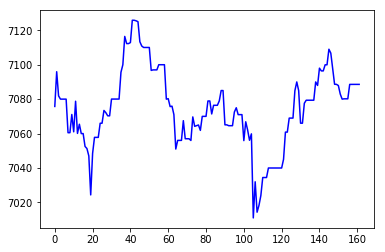

In [5]:
plt.plot(df['close'], 'b')

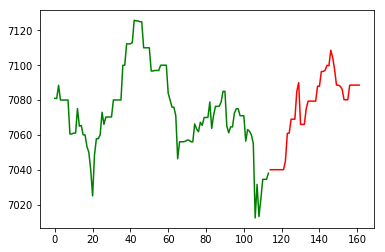

In [6]:
max = df['open'].count()
limit = int(0.3 * max)
plt.plot(df['open'][0:max - limit], 'g')
plt.plot(df['open'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11554def0>,
      dtype=object)

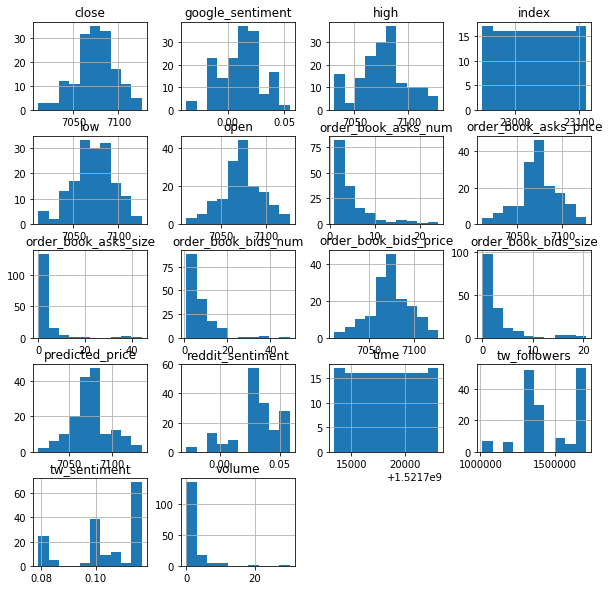

In [7]:
df.hist(figsize=(10,10))

In [8]:
from bitcoin.core import Core
core = Core()
core.train_scaler(df=df)

2018-03-22 14:38:43,025 root         INFO     ENV => test
2018-03-22 14:38:43,027 root         INFO     Train Scaler Model


(MinMaxScaler(copy=True, feature_range=(-1, 1)),
 MinMaxScaler(copy=True, feature_range=(-1, 1)))

In [9]:
from bitcoin.core import Core
core = Core()
history = core.train(df=df)

2018-03-22 14:38:43,093 root         INFO     ENV => test
2018-03-22 14:38:43,095 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            169600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 31/100
113/113 [==============================] - 0s 288us/step - loss: 40.4319 - mean_squared_error: 0.0118 - mean_absolute_error: 0.0835 - val_loss: 38.7317 - val_mean_squared_error: 0.0654 - val_mean_absolute_error: 0.2243
Epoch 32/100
113/113 [==============================] - 0s 259us/step - loss: 38.5892 - mean_squared_error: 0.0130 - mean_absolute_error: 0.0818 - val_loss: 36.9761 - val_mean_squared_error: 0.0664 - val_mean_absolute_error: 0.2271
Epoch 33/100
113/113 [==============================] - 0s 286us/step - loss: 36.8392 - mean_squared_error: 0.0142 - mean_absolute_error: 0.0903 - val_loss: 35.2847 - val_mean_squared_error: 0.0675 - val_mean_absolute_error: 0.2300
Epoch 34/100
113/113 [==============================] - 0s 327us/step - loss: 35.1444 - mean_squared_error: 0.0153 - mean_absolute_error: 0.0897 - val_loss: 33.6489 - val_mean_squared_error: 0.0673 - val_mean_absolute_error: 0.2303
Epoch 35/100
113/113 [==============================] - 0s 305us/step - 

Epoch 67/100
113/113 [==============================] - 0s 218us/step - loss: 6.0655 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0556 - val_loss: 5.7905 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.1201
Epoch 68/100
113/113 [==============================] - 0s 215us/step - loss: 5.7283 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0580 - val_loss: 5.4725 - val_mean_squared_error: 0.0167 - val_mean_absolute_error: 0.1187
Epoch 69/100
113/113 [==============================] - 0s 233us/step - loss: 5.4108 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0570 - val_loss: 5.1719 - val_mean_squared_error: 0.0162 - val_mean_absolute_error: 0.1172
Epoch 70/100
113/113 [==============================] - 0s 209us/step - loss: 5.1137 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0590 - val_loss: 4.8874 - val_mean_squared_error: 0.0142 - val_mean_absolute_error: 0.1092
Epoch 71/100
113/113 [==============================] - 0s 247us/step - loss: 4.

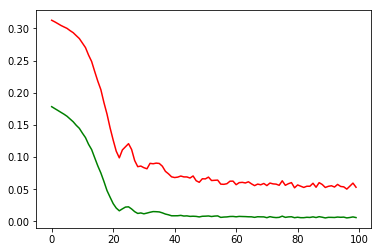

In [10]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [11]:
core.train_anomaly(df=df)

2018-03-22 14:38:54,537 root         INFO     Train Anomaly Model


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:    0.1s finished


KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [24]:
df_predicted = core.test_order_percent(df=df)
df_predicted

2018-03-22 14:49:06,409 root         INFO     Error Order percentage: 50.00%
2018-03-22 14:49:06,411 root         INFO     TEST From 2018-03-22 13:04:00 to 2018-03-22 13:51:00
2018-03-22 14:49:06,412 root         INFO     Number of api calls: 0.33 / min
2018-03-22 14:49:06,413 root         INFO     Number of anomalies: 0
2018-03-22 14:49:06,414 root         INFO     With prediction 1013.00 euros => 1.30% => 1.30% / day
2018-03-22 14:49:06,415 root         INFO     Without prediction 1006.90 euros => 0.69% => 0.69% / day


Empty DataFrame
Columns: [predicted]
Index: []


,predicted


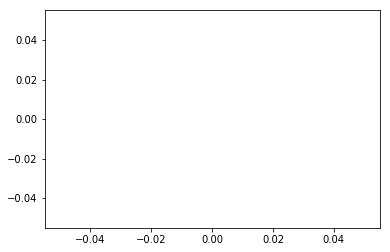

In [19]:
#plt.plot(df_test['open'], 'g')
plt.plot(df_predicted, 'r')